In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
plt.rcParams["figure.figsize"]=[10,5]

In [2]:
sales_report = pd.read_excel('C:/Users/User/sales report.xlsx')
sales_report.head()

,User ID,Product Code,Payment Status,Coupon code,Lead Registered Time,Sales Date,Source,Product Amount with GST,Payment Mode,Currency Code,Transaction Bank
0,user1,Product1,Initiated,NaN,2022-08-01 04:55:00,2022-07-31,Direct,3999.0,NaN,INR,NaN
1,user2,Product2,Initiated,NaN,2022-08-01 04:46:00,2022-07-31,Direct,999.0,NaN,INR,NaN
2,user4,Product3,Initiated,NaN,2022-08-01 03:21:00,2022-07-31,Direct,1999.0,NaN,INR,NaN
3,user6,Product3,Initiated,NaN,2022-08-01 00:56:00,2022-07-31,Direct,1999.0,NaN,INR,NaN
4,user8,Product4,Initiated,NaN,2022-08-01 00:46:00,2022-07-31,Direct,2022.0,NaN,INR,NaN


In [3]:
sales_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9514 entries, 0 to 9513
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   User ID                  9514 non-null   object        
 1   Product Code             9514 non-null   object        
 2   Payment Status           9514 non-null   object        
 3   Coupon code              662 non-null    object        
 4   Lead Registered Time     9514 non-null   datetime64[ns]
 5   Sales Date               9514 non-null   datetime64[ns]
 6   Source                   9514 non-null   object        
 7   Product Amount with GST  9513 non-null   float64       
 8   Payment Mode             1730 non-null   object        
 9   Currency  Code           9514 non-null   object        
 10  Transaction Bank         92 non-null     object        
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 817.7+ KB


In [4]:
sales_report.shape

(9514, 11)

In [5]:
sales_report.isnull().sum()

User ID                       0
Product Code                  0
Payment Status                0
Coupon code                8852
Lead Registered Time          0
Sales Date                    0
Source                        0
Product Amount with GST       1
Payment Mode               7784
Currency  Code                0
Transaction Bank           9422
dtype: int64

#  The report consists of many null values in 3 columns so we droping those columns so that we can get better accuracy

In [6]:
sales_report.drop(['Transaction Bank','Payment Mode','Coupon code'],axis = 1,inplace = True)

In [7]:
sales_report = sales_report.dropna()

In [8]:
sales_report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9513 entries, 0 to 9513
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   User ID                  9513 non-null   object        
 1   Product Code             9513 non-null   object        
 2   Payment Status           9513 non-null   object        
 3   Lead Registered Time     9513 non-null   datetime64[ns]
 4   Sales Date               9513 non-null   datetime64[ns]
 5   Source                   9513 non-null   object        
 6   Product Amount with GST  9513 non-null   float64       
 7   Currency  Code           9513 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 668.9+ KB


In [9]:
sales_report.columns

Index(['User ID', 'Product Code', 'Payment Status', 'Lead Registered Time',
       'Sales Date', 'Source', 'Product Amount with GST', 'Currency  Code'],
      dtype='object')

In [10]:
sales_report1 = sales_report.copy(deep = True)

In [11]:
sales_report1.head()

,User ID,Product Code,Payment Status,Lead Registered Time,Sales Date,Source,Product Amount with GST,Currency Code
0,user1,Product1,Initiated,2022-08-01 04:55:00,2022-07-31,Direct,3999.0,INR
1,user2,Product2,Initiated,2022-08-01 04:46:00,2022-07-31,Direct,999.0,INR
2,user4,Product3,Initiated,2022-08-01 03:21:00,2022-07-31,Direct,1999.0,INR
3,user6,Product3,Initiated,2022-08-01 00:56:00,2022-07-31,Direct,1999.0,INR
4,user8,Product4,Initiated,2022-08-01 00:46:00,2022-07-31,Direct,2022.0,INR


In [12]:
sales_report1['User ID'].shape

(9513,)

# Removing Duplicate Values from the  Columns

In [13]:
sales_report1.drop_duplicates(subset = 'User ID' , keep = 'first' ,inplace = True)

In [14]:
sales_report1['User ID'].shape

(5884,)

# Data Visulization

# Here We can clearly able to see that the payment was initiated nearly 70% and  28%  was paid and 2% got refund


<AxesSubplot:xlabel='Payment Status', ylabel='count'>

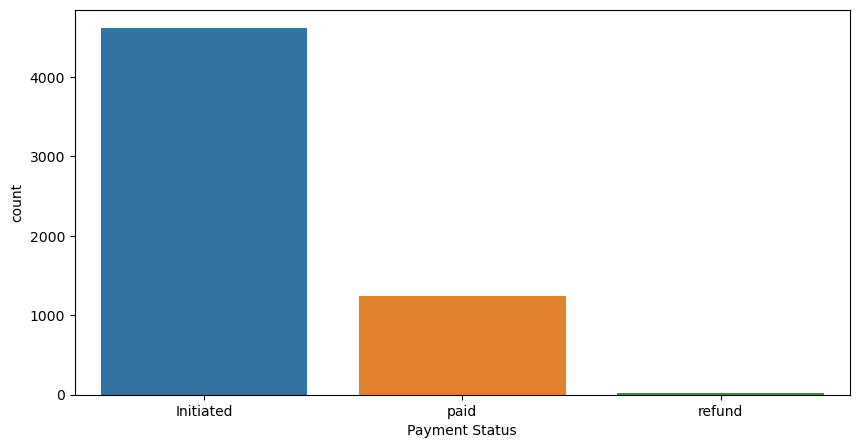

In [15]:
sns.countplot(sales_report1['Payment Status'])

# Here We can see that maximum payment was done by the currency of 85% of INR and 15% of USD

<AxesSubplot:xlabel='Currency  Code', ylabel='count'>

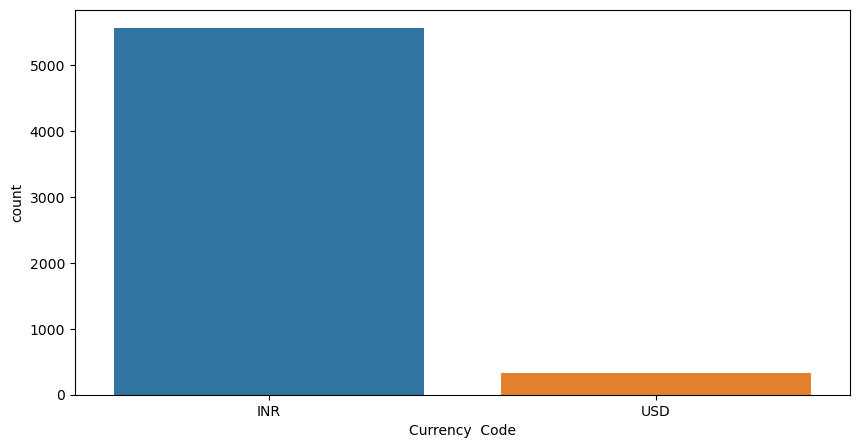

In [16]:
sns.countplot(sales_report1['Currency  Code'])

In [17]:
sales_report1['Source'].unique()

array(['Direct', 'Influencer', 'Email', 'Paid'], dtype=object)

<AxesSubplot:xlabel='Source', ylabel='count'>

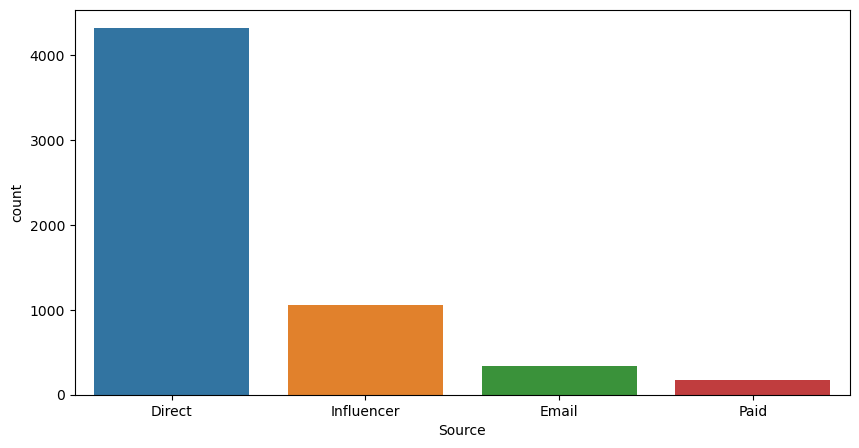

In [18]:
sns.countplot(sales_report1['Source'])

 Lets test our datas using ML model and see how our models performs

In [19]:
#Here I am replacing the values string to numeric for model testing
sales_report1['Source'].replace({'Direct':0,'Influencer':1,'Email':2,'Paid':3},inplace = True)

sales_report1['Source'].value_counts()

0    4314
1    1058
2     333
3     179
Name: Source, dtype: int64

In [20]:
sales_report1['Currency  Code'].replace({'INR':0,'USD':1},inplace = True)

sales_report1['Currency  Code'].value_counts()

0    5560
1     324
Name: Currency  Code, dtype: int64

In [22]:
import sklearn
from sklearn.model_selection import train_test_split

In [23]:
x = sales_report1.drop(['Lead Registered Time','Sales Date','Payment Status','User ID','Product Code'],axis = 1)

y = sales_report1['Payment Status']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=2)

In [24]:
x.head()

,Source,Product Amount with GST,Currency Code
0,0,3999.0,0
1,0,999.0,0
2,0,1999.0,0
3,0,1999.0,0
4,0,2022.0,0


In [25]:
y.head()

0    Initiated
1    Initiated
2    Initiated
3    Initiated
4    Initiated
Name: Payment Status, dtype: object

# Model Testing

Model testing with SVM
classification_Report 

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
SVM = SVC()
SVM.fit(x_train,y_train)
predicted_xtest = SVM.predict(x_test)
predicted_xtrain = SVM.predict(x_train)
print(classification_report(y_test,predicted_xtest))

              precision    recall  f1-score   support

   Initiated       0.79      1.00      0.88      1390
        paid       0.00      0.00      0.00       364
      refund       0.00      0.00      0.00        12

    accuracy                           0.79      1766
   macro avg       0.26      0.33      0.29      1766
weighted avg       0.62      0.79      0.69      1766



In [29]:
print(accuracy_score(y_train,predicted_xtrain))

0.7831471588149587


In [30]:
print(accuracy_score(y_test,predicted_xtest))


0.7870894677236693


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


test_acc=0
train_acc=0
for i in range(10,100):
    RTC = RandomForestClassifier(n_estimators = 15,random_state = 2)
    RTC.fit(x_train,y_train)
    predicted_xtest = RTC.predict(x_test)
    predicted_xtrain = RTC.predict(x_train)
    if test_acc > accuracy_score(y_test,predicted_xtest):
        break
    else:
        test_acc = accuracy_score(y_test,predicted_xtest)

print(f"RandomForestClassifier Accuracy for training the data   {accuracy_score(y_train,predicted_xtrain)}")
print("\n\n")
print(f"RandomForestClassifier Accuracy for  testing the data   {accuracy_score(y_test,predicted_xtest)}")

RandomForestClassifier Accuracy for training the data   0.8003885381253035



RandomForestClassifier Accuracy for  testing the data   0.7967157417893544


# Observation

In [ ]:
#Hence I check and see that Random forest classifier gives little better accuracy than SVM and I have Tried Some
#ensemble techniques also but no other models give better accuracy 

RandomForestClassifier Accuracy for training the data   0.8003885381253035

RandomForestClassifier Accuracy for  testing the data   0.7967157417893544
